In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import randint
from sklearn.metrics import make_scorer, f1_score

In [ ]:
import pandas as pd
import numpy as np
# Load CSV data
def load_csv(filename):
    data = pd.read_csv(filename)
    return data


# Load data
# merged_data = load_csv('/content/drive/MyDrive/data_for_prediction.csv')
merged_data = load_csv('/content/data_for_prediction.csv')

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
data_for_prediction = merged_data.copy()

# Map labels to binary format
data_for_prediction['label_binary'] = np.where(data_for_prediction['label'] == 'd', 1, 0)

##prep

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
def evaluate_imbalanced_metrics(y_true, y_pred):
    """
    Evaluate classification metrics for imbalanced classes.

    Args:
    - y_true (array-like): True labels.
    - y_pred (array-like): Predicted labels.

    Returns:
    - metrics_dict (dict): Dictionary containing evaluation metrics.
    """
    # Calculate precision, recall, and F1-score
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate positive class ratio
    pos_ratio = np.mean(y_true)

    # Calculate balanced accuracy
    balanced_accuracy = (recall + (1 - pos_ratio)) / 2

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Create dictionary to store metrics
    metrics_dict = {
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'Accuracy': accuracy,
        'Positive class ratio': pos_ratio,
        'Balanced accuracy': balanced_accuracy
    }

    return metrics_dict


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test =train_test_split(data_for_prediction["combined_text"],data_for_prediction["label_binary"],test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import make_scorer, f1_score
scorer = make_scorer(f1_score)

##Naive bayes Classifier

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters (Randomized Search): {'classifier__alpha': 0.06545913276690207, 'vectorizer__ngram_range': (1, 4)}
Classification Report (Randomized Search):
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      8897
           1       0.60      0.49      0.54      2488

    accuracy                           0.82     11385
   macro avg       0.73      0.70      0.71     11385
weighted avg       0.81      0.82      0.81     11385



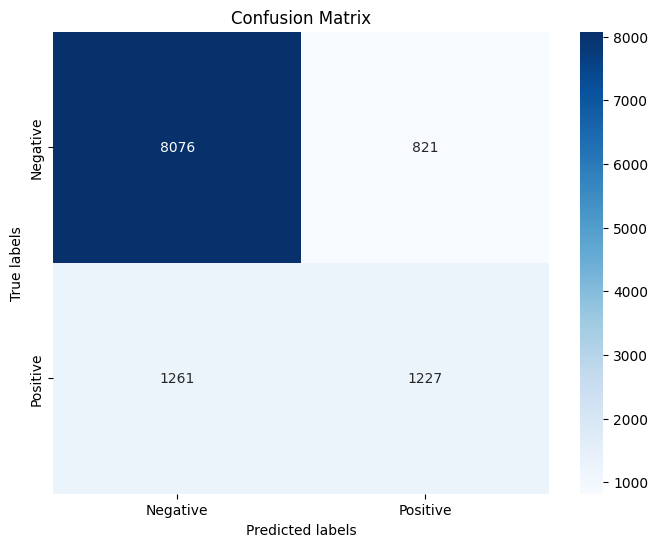

{'Precision': 0.59912109375, 'Recall': 0.49316720257234725, 'F1-score': 0.541005291005291, 'Accuracy': 0.8171277997364954, 'Positive class ratio': 0.21853315766359244, 'Balanced accuracy': 0.6373170224543774}


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  # Convert text data into feature vectors
    ('classifier', MultinomialNB())     # Naive Bayes classifier
])

# Define hyperparameters distributions for randomized search
param_dist = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3), (1,4)],  # Unigrams or bigrams
    'classifier__alpha': uniform(0, 1)                    # Uniform distribution between 0 and 1 for alpha
}

# Perform randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring=scorer, verbose=1)
random_search.fit(X_train, Y_train)

# Print the best parameters found by randomized search
print("Best Parameters (Randomized Search):", random_search.best_params_)

# Evaluate the tuned model on the test set
predictions_random = random_search.predict(X_test)
print("Classification Report (Randomized Search):")
print(classification_report(Y_test, predictions_random))
metrics = evaluate_imbalanced_metrics(Y_test, predictions_random)
print(metrics)

##Decision Tree

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(data_for_prediction["combined_text"], data_for_prediction["label_binary"], test_size=0.2, random_state=42)

# Define a pipeline with CountVectorizer and DecisionTreeClassifier
pipeline_dt = Pipeline([
    ('vectorizer', CountVectorizer()),        # Convert text data into feature vectors
    ('classifier', DecisionTreeClassifier())  # Decision Tree classifier
])

# Define hyperparameters distributions for RandomizedSearchCV
param_dist_dt = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],  # Unigrams or bigrams
    'classifier__max_depth': randint(10, 100),                  # Maximum depth of the tree
    'classifier__min_samples_split': randint(2, 20),             # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': randint(1, 10)               # Minimum number of samples required to be at a leaf node
}

# Perform randomized search for hyperparameter tuning for Decision Tree classifier
random_search_dt = RandomizedSearchCV(pipeline_dt, param_distributions=param_dist_dt, n_iter=5, cv=5, scoring=scorer, verbose=1, random_state=42)
random_search_dt.fit(X_train, Y_train)

# Print the best parameters found by randomized search for Decision Tree classifier
print("Best Parameters (Decision Tree):", random_search_dt.best_params_)

# Evaluate the tuned Decision Tree model on the test set
predictions_dt = random_search_dt.predict(X_test)
print("Decision Tree Classifier:")
print(classification_report(Y_test, predictions_dt))
metrics = evaluate_imbalanced_metrics(Y_test, predictions_dt)
print(metrics)



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import randint
from sklearn.metrics import make_scorer, f1_score

# Define a custom scorer if needed
scorer = make_scorer(f1_score)

# Define a pipeline with CountVectorizer and SVM
pipeline_svm = Pipeline([
    ('vectorizer', CountVectorizer()),  # Convert text data into feature vectors
    ('classifier', SVC())               # Support Vector Machine classifier
])

# Define hyperparameters distributions for RandomizedSearchCV
param_dist_svm = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],   # Unigrams or bigrams
    'classifier__C': randint(1, 100),                      # Regularization parameter
    'classifier__kernel': ['linear', 'rbf'],               # Kernel type
}

# Perform randomized search for hyperparameter tuning for SVM classifier
random_search_svm = RandomizedSearchCV(pipeline_svm, param_distributions=param_dist_svm, n_iter=10, cv=5, scoring=scorer, verbose=1, n_jobs=-1, random_state=42)
random_search_svm.fit(X_train, Y_train)

# Print the best parameters found by randomized search for SVM classifier
print("Best Parameters (SVM):", random_search_svm.best_params_)

# Evaluate the tuned SVM model on the test set
predictions_svm = random_search_svm.predict(X_test)
print("SVM Classifier:")
print(classification_report(Y_test, predictions_svm))
metrics = evaluate_imbalanced_metrics(Y_test, predictions_svm)
print(metrics)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters (Random Forest): {'classifier__max_depth': 98, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 28, 'classifier__n_estimators': 200, 'vectorizer__ngram_range': (1, 2)}
Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      8897
           1       1.00      0.01      0.03      2488

    accuracy                           0.78     11385
   macro avg       0.89      0.51      0.45     11385
weighted avg       0.83      0.78      0.69     11385



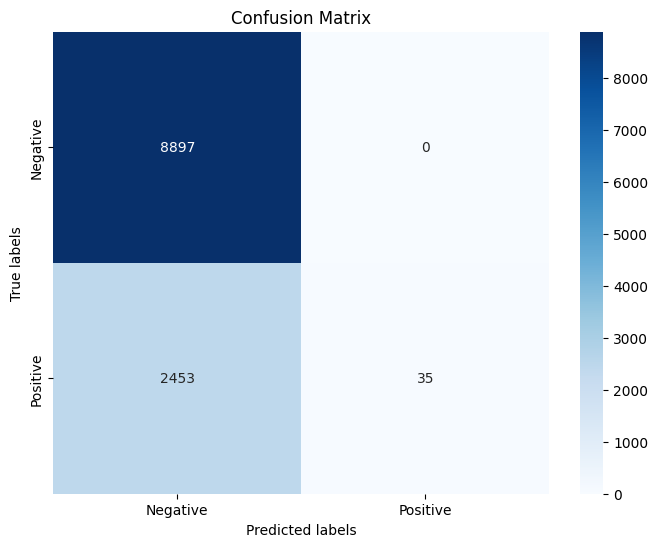

{'Precision': 1.0, 'Recall': 0.014067524115755627, 'F1-score': 0.02774474831549742, 'Accuracy': 0.7845410628019324, 'Positive class ratio': 0.21853315766359244, 'Balanced accuracy': 0.39776718322608157}


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint

# Define a pipeline with CountVectorizer and RandomForestClassifier
pipeline_rf = Pipeline([
    ('vectorizer', CountVectorizer()),          # Convert text data into feature vectors
    ('classifier', RandomForestClassifier())    # Random Forest classifier
])

# Define hyperparameters distributions for RandomizedSearchCV
param_dist_rf = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4),(1,5)],  # Unigrams or bigrams
    'classifier__n_estimators': [200, 300],         # Number of trees in the forest
    'classifier__max_depth': randint(10, 100),        # Maximum depth of the trees
    'classifier__min_samples_split': randint(2, 50), # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': randint(1, 10)   # Minimum number of samples required to be at a leaf node
}

# Perform randomized search for hyperparameter tuning for Random Forest classifier
random_search_rf = RandomizedSearchCV(pipeline_rf, param_distributions=param_dist_rf, n_iter=10, cv=5, scoring=scorer, verbose=1, random_state=42)
random_search_rf.fit(X_train, Y_train)

# Print the best parameters found by randomized search for Random Forest classifier
print("Best Parameters (Random Forest):", random_search_rf.best_params_)

# Evaluate the tuned Random Forest model on the test set
predictions_rf = random_search_rf.predict(X_test)
print("Random Forest Classifier:")
print(classification_report(Y_test, predictions_rf))
metrics = evaluate_imbalanced_metrics(Y_test,predictions_rf)
print(metrics)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters (Gradient Boosting): {'n_estimators': 150, 'min_samples_split': 2, 'max_depth': 7, 'learning_rate': 0.2}
Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      8897
           1       0.77      0.27      0.40      2488

    accuracy                           0.82     11385
   macro avg       0.80      0.63      0.65     11385
weighted avg       0.82      0.82      0.79     11385



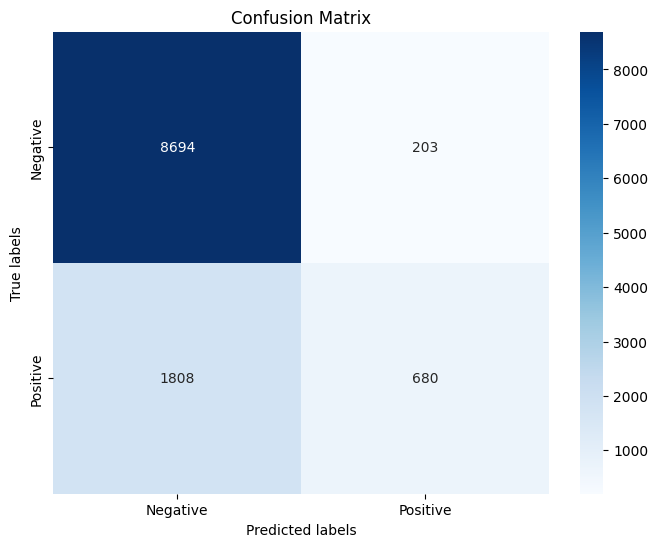

{'Precision': 0.7701019252548131, 'Recall': 0.2733118971061093, 'F1-score': 0.4034411153960249, 'Accuracy': 0.8233640755379886, 'Positive class ratio': 0.21853315766359244, 'Balanced accuracy': 0.5273893697212584}


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Preprocess your text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Define hyperparameters distributions for randomized search
param_dist_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
}

# Perform randomized search for Gradient Boosting hyperparameter tuning
random_search_gb = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist_gb, cv=3, scoring=scorer, verbose=1, n_iter=5)
random_search_gb.fit(X_train_vectorized, Y_train)

# Print the best parameters found by randomized search for Gradient Boosting
print("Best Parameters (Gradient Boosting):", random_search_gb.best_params_)

# Predict on the test set using the best model from randomized search
predictions_gb = random_search_gb.predict(X_test_vectorized)

# Print classification report
print("Gradient Boosting Classifier:")
print(classification_report(Y_test, predictions_gb))
metrics = evaluate_imbalanced_metrics(Y_test,predictions_gb)
print(metrics)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Define function to tokenize and encode text data for BERT
def tokenize_and_encode(texts):
    input_ids = []
    attention_masks = []
    for text in texts:
        encoded_dict = tokenizer.encode_plus(text, add_special_tokens=True, max_length=128, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)

# Tokenize and encode training data
X_train_input_ids, X_train_attention_masks = tokenize_and_encode(X_train)

# Define hyperparameters distributions for randomized search
param_dist_bert = {
    'num_train_epochs': [2, 3, 4],
    'learning_rate': [2e-5, 3e-5, 5e-5],
    'per_device_train_batch_size': [8, 16, 32],
}

# Perform randomized search for BERT hyperparameter tuning
random_search_bert = RandomizedSearchCV(estimator=model, param_distributions=param_dist_bert, cv=3, scoring=scorer, verbose=1, n_iter=5)
random_search_bert.fit(X_train_input_ids, Y_train)

# Print the best parameters found by randomized search for BERT
print("Best Parameters (BERT):", random_search_bert.best_params_)

predictions_bert = random_search_bert.predict(X_test)
print("Bert:")
print(classification_report(Y_test, predictions_bert))
metrics = evaluate_imbalanced_metrics(Y_test,predictions_bert)
print(metrics)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In t

TypeError: Cannot clone object 'BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
          )
          (intermediate): BertIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermediate_act_fn): GELUActivation()
          )
          (output): BertOutput(
            (dense): Linear(in_features=3072, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
    )
    (pooler): BertPooler(
      (dense): Linear(in_features=768, out_features=768, bias=True)
      (activation): Tanh()
    )
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (classifier): Linear(in_features=768, out_features=2, bias=True)
)' (type <class 'transformers.models.bert.modeling_bert.BertForSequenceClassification'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
import torch

# Define a custom BERT estimator compatible with scikit-learn
class BertEstimator(BaseEstimator):
    def __init__(self, num_train_epochs=3, learning_rate=3e-5, per_device_train_batch_size=16):
        self.num_train_epochs = num_train_epochs
        self.learning_rate = learning_rate
        self.per_device_train_batch_size = per_device_train_batch_size
        self.model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    def fit(self, X, y):
        # Tokenize and encode training data
        train_input_ids, train_attention_masks = self.tokenize_and_encode(X)
        train_labels = torch.tensor(y)

        # Define optimizer and loss function
        optimizer = torch.optim.AdamW(self.model.parameters(), lr=self.learning_rate)
        loss_fn = torch.nn.CrossEntropyLoss()

        # Train the model
        for epoch in range(self.num_train_epochs):
            self.model.train()
            for i in range(0, len(X), self.per_device_train_batch_size):
                optimizer.zero_grad()
                batch_input_ids = train_input_ids[i:i+self.per_device_train_batch_size]
                batch_attention_masks = train_attention_masks[i:i+self.per_device_train_batch_size]
                batch_labels = train_labels[i:i+self.per_device_train_batch_size]
                outputs = self.model(input_ids=batch_input_ids, attention_mask=batch_attention_masks, labels=batch_labels)
                loss = outputs.loss
                loss.backward()
                optimizer.step()

    def predict(self, X):
        # Tokenize and encode test data
        test_input_ids, test_attention_masks = self.tokenize_and_encode(X)

        # Predict labels
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(input_ids=test_input_ids, attention_mask=test_attention_masks)
            logits = outputs.logits
            predicted_labels = torch.argmax(logits, dim=1)
        return predicted_labels

    def tokenize_and_encode(self, texts):
        input_ids = []
        attention_masks = []
        for text in texts:
            encoded_dict = self.tokenizer.encode_plus(text, add_special_tokens=True, max_length=128, pad_to_max_length=True, return_attention_mask=True, return_tensors='pt')
            input_ids.append(encoded_dict['input_ids'])
            attention_masks.append(encoded_dict['attention_mask'])
        return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)

# Create a pipeline with the BERT estimator
pipeline = Pipeline([
    ('bert', BertEstimator()),
])

# Define hyperparameters distributions for randomized search
param_dist_bert = {
    'bert__num_train_epochs': [2, 3, 4],
    'bert__learning_rate': [2e-5, 3e-5, 5e-5],
    'bert__per_device_train_batch_size': [8, 16, 32],
}

# Define a custom scorer for accuracy
def custom_scorer(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

scorer = make_scorer(custom_scorer)

import numpy as np

# Convert Y_train to a numpy array
Y_train_array = np.array(Y_train)

# Reset indices of X_train and Y_train
X_train_reset = X_train.reset_index(drop=True)
Y_train_reset = Y_train.reset_index(drop=True)

# Perform randomized search for BERT hyperparameter tuning
random_search_bert = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist_bert, cv=3, scoring=scorer, verbose=1, n_iter=5)
random_search_bert.fit(X_train_reset, Y_train_array)

# Print the best parameters found by randomized search for BERT
print("Best Parameters (BERT):", random_search_bert.best_params_)

predictions_bert = random_search_bert.predict(X_test)
print("Bert:")
print(classification_report(Y_test, predictions_bert))
metrics = evaluate_imbalanced_metrics(Y_test, predictions_bert)
print(metrics)


# # Perform randomized search for BERT hyperparameter tuning
# random_search_bert = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist_bert, cv=3, scoring=scorer, verbose=1, n_iter=5)
# random_search_bert.fit(X_train, Y_train)

# # Print the best parameters found by randomized search for BERT
# print("Best Parameters (BERT):", random_search_bert.best_params_)

# predictions_bert = random_search_bert.predict(X_test)
# print("Bert:")
# print(classification_report(Y_test, predictions_bert))
# metrics = evaluate_imbalanced_metrics(Y_test, predictions_bert)
# print(metrics)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In t